In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# loading the updated data so not to run the above cells
df_tesco = pd.read_csv('datasets/updated_data/updated_All_Data_Tesco.csv')

df_tesco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29366429 entries, 0 to 29366428
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   supermarket      object 
 1   price            float64
 2   per_unit_price   float64
 3   unit             object 
 4   names            object 
 5   date             object 
 6   category         object 
 7   own_brand        bool   
 8   Week             int64  
 9   Quantity         int64  
 10  Revenue          float64
 11  day_of_week_num  int64  
 12  week_of_month    int64  
dtypes: bool(1), float64(3), int64(4), object(5)
memory usage: 2.7+ GB


In [3]:
# Convert 'date' column to datetime format
df_tesco['date'] = pd.to_datetime(df_tesco['date'])

# Adding a 'day_of_week_num' column (Monday=0, Sunday=6)
df_tesco['day_of_week_num'] = df_tesco['date'].dt.dayofweek

# Adding a 'week_of_month' column
df_tesco['week_of_month'] = df_tesco['date'].apply(lambda x: (x.day-1) // 7 + 1)

In [4]:
# columns to be copied into a new dataframe
columnstoCopy_tesco = ['date', 'category', 'Revenue', 'day_of_week_num', 'week_of_month']
tescoSub_data = df_tesco[columnstoCopy_tesco].copy()

In [5]:
categories = [
    'meat_poultry_fish', 'other_food_cupboard', 'frozen', 'other_fresh_food', 
    'other_drinks', 'bakery', 'vegetables', 'cooking_essentials', 'fruits', 
    'other_household', 'pantry_staples', 'alcoholic_beverages', 'cold_beverages', 
    'personal_care', 'cleaning_supplies', 'pets', 'other_health_products', 
    'breakfast_items', 'baby_products', 'hot_beverages', 'free-from', 
    'medication', 'kitchen_essentials', 'coffee_and_tea_related'
]

# Defining a custom mapping dictionary
customMapping = {
    'meat_poultry_fish': 1,
    'other_food_cupboard': 2,
    'frozen': 3,
    'other_fresh_food': 4,
    'other_drinks': 5,
    'bakery': 6,
    'vegetables': 7,
    'cooking_essentials': 8,
    'fruits': 9,
    'other_household': 10,
    'pantry_staples': 11,
    'alcoholic_beverages': 12,
    'cold_beverages': 13,
    'personal_care': 14,
    'cleaning_supplies': 15,
    'pets': 16,
    'other_health_products': 17,
    'breakfast_items': 18,
    'baby_products': 19,
    'hot_beverages': 20,
    'free-from': 21,
    'medication': 22,
    'kitchen_essentials': 23,
    'coffee_and_tea_related': 24
}

# Applying custom mapping to categories
categoryNumericalCustom = [customMapping[cat] for cat in categories]

# Overwriting the content within the category column (changing from string to numerical)
tescoSub_data['category'] = tescoSub_data['category'].map(customMapping)

# Checking to see if the changes have been made
tescoSub_data.head()

,date,category,Revenue,day_of_week_num,week_of_month
0,2024-04-13,10.0,2.0,5,2
1,2024-04-13,10.0,2.8,5,2
2,2024-04-13,10.0,1.6,5,2
3,2024-04-13,10.0,2.0,5,2
4,2024-04-13,10.0,2.4,5,2


In [6]:
tescoSub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29366429 entries, 0 to 29366428
Data columns (total 5 columns):
 #   Column           Dtype         
---  ------           -----         
 0   date             datetime64[ns]
 1   category         float64       
 2   Revenue          float64       
 3   day_of_week_num  int32         
 4   week_of_month    int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 1008.2 MB


In [7]:
# Ensure 'date' is a datetime object
tescoSub_data['date'] = pd.to_datetime(tescoSub_data['date'])

# Sort DataFrame by 'date'
tescoSub_data.sort_values('date', inplace=True)

# sin and cosine components
tescoSub_data['sin_day'] = np.sin(2*np.pi*tescoSub_data['day_of_week_num']/7)
tescoSub_data['cos_day'] = np.cos(2*np.pi*tescoSub_data['day_of_week_num']/7)

# sine and cosine for week of the month
tescoSub_data['sin_week'] = np.sin(2*np.pi*tescoSub_data['week_of_month']/4)
tescoSub_data['cos_week'] = np.cos(2*np.pi*tescoSub_data['week_of_month']/4)

# Calculate the number of days since each category was last seen
tescoSub_data['Last_Seen_Days'] = tescoSub_data.groupby('category')['date'].transform(lambda x: x.diff().dt.days)

# Display the DataFrame
tescoSub_data.head()

,date,category,Revenue,day_of_week_num,week_of_month,sin_day,cos_day,sin_week,cos_week,Last_Seen_Days
29366428,2024-01-09,17.0,114.00,1,2,0.781831,0.62349,1.224647e-16,-1.0,NaN
29160781,2024-01-09,2.0,8.75,1,2,0.781831,0.62349,1.224647e-16,-1.0,NaN
29160782,2024-01-09,2.0,8.75,1,2,0.781831,0.62349,1.224647e-16,-1.0,0.0
29160783,2024-01-09,2.0,8.75,1,2,0.781831,0.62349,1.224647e-16,-1.0,0.0
29160784,2024-01-09,2.0,8.75,1,2,0.781831,0.62349,1.224647e-16,-1.0,0.0


In [8]:
tescoSub_data.dropna(inplace=True)
tescoSub_data['Last_Seen_Days'].value_counts()

Last_Seen_Days
0.0    24588750
1.0        1964
2.0          76
3.0          23
Name: count, dtype: int64

In [9]:
# Creating lags
tescoSub_data.sort_values('date', inplace=True)  # Sort data by date if not already sorted
#tescoSub_data.set_index('date', inplace=True)
tescoSub_data.sort_index(inplace=True) 
#tescoSub_data.set_index('date', inplace=True)  # Set 'date' as index if you want to use date functionality

# Create lagged data columns
tescoSub_data['Revenue_lag1'] = tescoSub_data.groupby('category')['Revenue'].shift(1)
tescoSub_data['Revenue_lag2'] = tescoSub_data.groupby('category')['Revenue'].shift(2)
tescoSub_data['Revenue_lag3'] = tescoSub_data.groupby('category')['Revenue'].shift(3)
tescoSub_data['sin_day_lag1'] = tescoSub_data.groupby('category')['sin_day'].shift(1)
tescoSub_data['cos_day_lag1'] = tescoSub_data.groupby('category')['cos_day'].shift(1)
tescoSub_data['sin_week_lag1'] = tescoSub_data.groupby('category')['sin_week'].shift(1)
tescoSub_data['cos_week_lag1'] = tescoSub_data.groupby('category')['cos_week'].shift(1)

#df['Revenue_change'] = (df['Revenue'] - df['Revenue_lag1'])/df['Revenue_lag1']

# Calcul#ate the 7-day rolling mean
tescoSub_data['weekly_rolling_avg'] = tescoSub_data['Revenue_lag1'].rolling(window=7, min_periods=1).mean()

# Calculate the 7-day rolling standard deviation
tescoSub_data['weekly_rolling_std'] = tescoSub_data['Revenue_lag1'].rolling(window=7, min_periods=1).std()

#print(tescoSub_data[['weekly_rolling_avg', 'weekly_rolling_std']])

# Resample data to weekly frequency, calculate mean and std for each week
#weekly_data = tescoSub_data.resample('W').agg({'Revenue_lag1': ['mean', 'std']})
#weekly_data.columns = ['weekly_avg', 'weekly_std']  # Flatten the column hierarchy
#print(weekly_data)

# Handle any NaN values that arise from shifting
tescoSub_data.fillna(0, inplace=True)  # You may choose to handle NaNs differently based on your context

# Now your DataFrame includes lagged variables
tescoSub_data

,date,category,Revenue,day_of_week_num,week_of_month,sin_day,cos_day,sin_week,cos_week,Last_Seen_Days,Revenue_lag1,Revenue_lag2,Revenue_lag3,sin_day_lag1,cos_day_lag1,sin_week_lag1,cos_week_lag1,weekly_rolling_avg,weekly_rolling_std
0,2024-04-13,10.0,2.0,5,2,-0.974928,-0.222521,1.224647e-16,-1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000
1,2024-04-13,10.0,2.8,5,2,-0.974928,-0.222521,1.224647e-16,-1.0,0.0,2.0,0.0,0.0,-0.974928,-0.222521,1.224647e-16,-1.0,2.000000,0.000000
2,2024-04-13,10.0,1.6,5,2,-0.974928,-0.222521,1.224647e-16,-1.0,0.0,2.8,2.0,0.0,-0.974928,-0.222521,1.224647e-16,-1.0,2.400000,0.565685
3,2024-04-13,10.0,2.0,5,2,-0.974928,-0.222521,1.224647e-16,-1.0,0.0,1.6,2.8,2.0,-0.974928,-0.222521,1.224647e-16,-1.0,2.133333,0.611010
4,2024-04-13,10.0,2.4,5,2,-0.974928,-0.222521,1.224647e-16,-1.0,0.0,2.0,1.6,2.8,-0.974928,-0.222521,1.224647e-16,-1.0,2.100000,0.503322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29366423,2024-01-09,17.0,133.0,1,2,0.781831,0.623490,1.224647e-16,-1.0,0.0,133.0,133.0,133.0,0.781831,0.623490,1.224647e-16,-1.0,119.428571,32.382388
29366424,2024-01-09,17.0,114.0,1,2,0.781831,0.623490,1.224647e-16,-1.0,0.0,133.0,133.0,133.0,0.781831,0.623490,1.224647e-16,-1.0,116.714286,29.898240
29366425,2024-01-09,17.0,114.0,1,2,0.781831,0.623490,1.224647e-16,-1.0,0.0,114.0,133.0,133.0,0.781831,0.623490,1.224647e-16,-1.0,124.857143,14.949120
29366426,2024-01-09,17.0,133.0,1,2,0.781831,0.623490,1.224647e-16,-1.0,0.0,114.0,114.0,133.0,0.781831,0.623490,1.224647e-16,-1.0,127.571429,9.271051


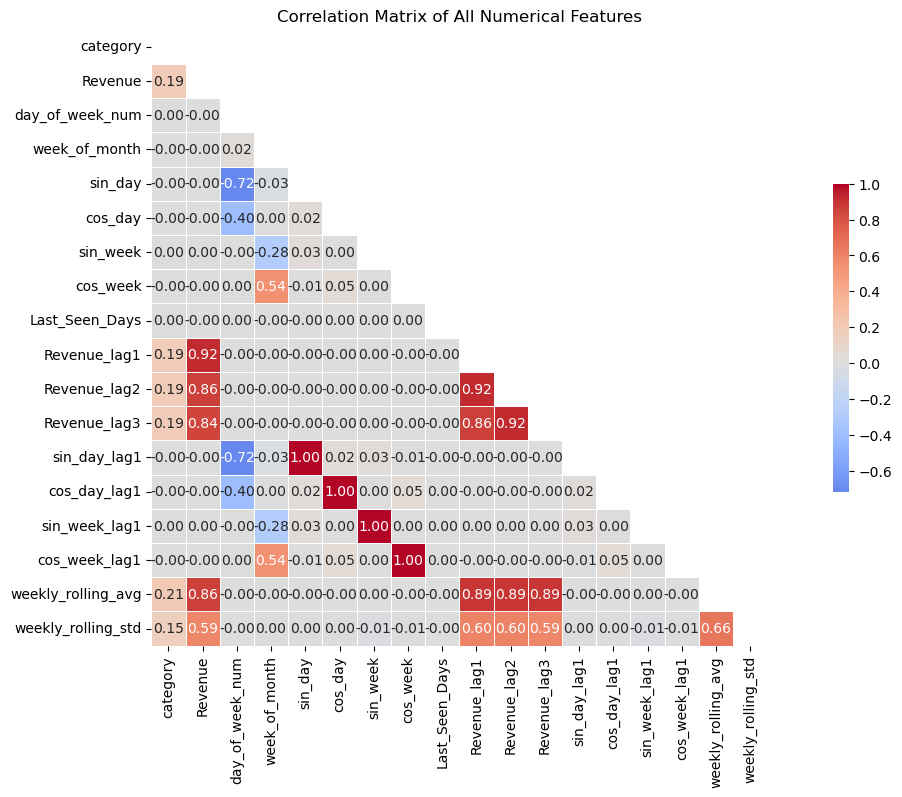

In [10]:
# Compute the correlation matrix for all columns except 'date' as it's datetime
numerical_tescoSub_data = tescoSub_data.select_dtypes(include=[np.number])
corr = numerical_tescoSub_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(17, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add title and format axes
plt.title('Correlation Matrix of All Numerical Features')
plt.yticks(rotation=0)

# Show plot
plt.show()

In [11]:
# This function is used to reduce memory of a pandas dataframe
# The idea is cast the numeric type to another more memory-effective type
# For ex: Features "age" should only need type='np.int8'
# Source: https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object and col_type.name != 'category' and 'datetime' not in col_type.name:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif 'datetime' not in col_type.name:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [12]:
reduced_tesco = reduce_mem_usage(tescoSub_data)
reduced_tesco.head()

Memory usage of dataframe is 3658.45 MB
Memory usage after optimization is: 1172.58 MB
Decreased by 67.9%


,date,category,Revenue,day_of_week_num,week_of_month,sin_day,cos_day,sin_week,cos_week,Last_Seen_Days,Revenue_lag1,Revenue_lag2,Revenue_lag3,sin_day_lag1,cos_day_lag1,sin_week_lag1,cos_week_lag1,weekly_rolling_avg,weekly_rolling_std
0,2024-04-13,10.0,2.000000,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,2024-04-13,10.0,2.800781,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,2.000000,0.000000,0.000000,-0.975098,-0.222534,0.0,-1.0,2.000000,0.000000
2,2024-04-13,10.0,1.599609,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,2.800781,2.000000,0.000000,-0.975098,-0.222534,0.0,-1.0,2.400391,0.565918
3,2024-04-13,10.0,2.000000,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,1.599609,2.800781,2.000000,-0.975098,-0.222534,0.0,-1.0,2.132812,0.610840
4,2024-04-13,10.0,2.400391,5,2,-0.975098,-0.222534,0.0,-1.0,0.0,2.000000,1.599609,2.800781,-0.975098,-0.222534,0.0,-1.0,2.099609,0.503418


In [13]:
# Sample 10% of the data without replacement for the sampled data
sampled_df = reduced_tesco.sample(frac=0.1, random_state=42)

# Get the indices of the sampled data
sampled_indices = sampled_df.index

# Display the size of the original and sampled dataframes
print(f"Original Data Size: {len(reduced_tesco)}")
print(f"Sampled Data Size: {len(sampled_df)}")

Original Data Size: 24590813
Sampled Data Size: 2459081


In [14]:
#Get the indices of the sampled data
sampled_indices = sampled_df.index

# Drop these indices from the original dataframe to create the test set
test_set_df = reduced_tesco.drop(sampled_indices)

# show the size of the test set
print(f"Test set data size: {len(test_set_df)}")

Test set data size: 22131732


In [15]:
# Save the sampled DataFrame to a CSV file
sampled_df.to_csv('datasets/sampled_test_datasets/sampled_data_tesco.csv', index=False)

# Save the test set DataFrame to a CSV file
test_set_df.to_csv('datasets/sampled_test_datasets/test_set_data_tesco.csv', index=False)

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split

# Load data
train_data = pd.read_csv('datasets/sampled_test_datasets/sampled_data_tesco.csv')
test_data = pd.read_csv('datasets/sampled_test_datasets/test_set_data_tesco.csv')

# Ensure 'date' is a datetime object
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

# Separate features and target
X_train_full = train_data.drop(['date','Revenue'], axis=1)
y_train_full = train_data['Revenue']
X_test = test_data.drop(['date','Revenue'], axis=1)
y_test = test_data['Revenue']

# Splitting training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


In [ ]:
X_train_full.head()

In [ ]:
# Continue with your data splitting and model training
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [ ]:
X_train_full.info()

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math



# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Validate the model
y_pred_val = lin_reg.predict(X_val)

# Evaluation metrics
print("Validation RMSE:", math.sqrt(mean_squared_error(y_val, y_pred_val)))
print("Validation MAE:", mean_absolute_error(y_val, y_pred_val))
print("Validation R^2:", r2_score(y_val, y_pred_val))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, 
                               random_state=42)
rf_reg.fit(X_train, y_train)

# Validate the model
y_pred_val = rf_reg.predict(X_val)

# Evaluation metrics
print("Validation RMSE:", math.sqrt(mean_squared_error(y_val, y_pred_val)))
print("Validation MAE:", mean_absolute_error(y_val, y_pred_val))
print("Validation R^2:", r2_score(y_val, y_pred_val))

## XGBoost

In [ ]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, 
                             learning_rate=0.1, 
                             random_state=42)
xgb_model.fit(X_train, y_train)

# Validate the model
y_pred_val = xgb_model.predict(X_val)

# Evaluation metrics
print("Validation RMSE:", math.sqrt(mean_squared_error(y_val, y_pred_val)))
print("Validation MAE:", mean_absolute_error(y_val, y_pred_val))
print("Validation R^2:", r2_score(y_val, y_pred_val))

## ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Initialize and train the ANN model
ann_model = Sequential()
ann_model.add(Dense(128, activation='relu', 
                    input_dim=X_train.shape[1]))
ann_model.add(Dense(1))
ann_model.compile(optimizer='adam', 
                  loss='mean_squared_error')

# Fit model
ann_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)

# Validate the model
y_pred_val = ann_model.predict(X_val)

# Evaluation metrics
print("Validation RMSE:", math.sqrt(mean_squared_error(y_val, y_pred_val)))
print("Validation MAE:", mean_absolute_error(y_val, y_pred_val))
print("Validation R^2:", r2_score(y_val, y_pred_val))

## LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Convert all data to float to prevent type issues with TensorFlow/Keras
X_train_full = X_train_full.astype(float)
X_test = X_test.astype(float)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, 
                                                  test_size=0.2, random_state=42)

# Reshape X for LSTM input [samples, time steps, features]
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_reshaped = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define and compile the LSTM model
model = Sequential([
    LSTM(50, input_shape=(1, X_train.shape[1]), return_sequences=True),
    LSTM(50, return_sequences=False),
    Dense(1)
])
model.compile(loss='mean_squared_error', 
              optimizer='adam')

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=5, 
                               restore_best_weights=True)

# Fit the model to the training data with early stopping
model.fit(X_train_reshaped, y_train, 
          epochs=35, batch_size=72, 
          validation_data=(X_val_reshaped, y_val), 
          verbose=2, callbacks=[early_stopping])

# Predict using the test set to evaluate the model
y_test_pred = model.predict(X_test_reshaped)

# Evaluation metrics
print("Validation RMSE:", math.sqrt(mean_squared_error(y_val, y_pred_val)))
print("Validation MAE:", mean_absolute_error(y_val, y_pred_val))
print("Validation R^2:", r2_score(y_val, y_pred_val))

## For the test set

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, X_test, y_test):
    # Making predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculating the metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R^2: {r2}")

# Assuming models are named as lin_reg, rf_reg, xgb_model, lstm_model, ann_model

# Evaluate Linear Regression
print("Linear Regression Results:")
evaluate_model(lin_reg, X_test, y_test)

# Evaluate Random Forest
print("Random Forest Results:")
evaluate_model(rf_reg, X_test, y_test)

# Evaluate XGBoost
print("XGBoost Results:")
evaluate_model(xgb_model, X_test, y_test)

# Evaluate ANN
print("ANN Results:")
evaluate_model(ann_model, X_test, y_test)

# Evaluate LSTM
X_test_reshaped = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
print("LSTM Results:")
evaluate_model(model, X_test_reshaped, y_test) 